In [1]:
# Look at HBL wide uncertainty and quality (weighted mean, best value) for start, end, length

In [2]:
# imports
import rioxarray as rxr
import numpy as np

import xarray as xr
xr.set_options(use_bottleneck = False) # Just found out about this... I wonder if there are any impacts in code?
# https://github.com/pydata/xarray/issues/7336

import matplotlib.pyplot as plt

In [3]:
# dask cluster
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62223,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:62282,Total threads: 10
Dashboard: http://127.0.0.1:62289/status,Memory: 0 B
Nanny: tcp://127.0.0.1:62226,


2025-01-16 20:05:10,885 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:10,896 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:10,903 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:10,910 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:11,391 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:12,015 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:12,051 - distributed.nanny - WARNING - Restarting worker
2025-01-16 20:05:12,062 - distributed.nanny - WARNING - Restarting worker


# Data

In [4]:
# data (start yearly uncertainty)

# start uncertainty 2018-2019
start_u_1819 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1819\start\HLS_Fmask_snow_start_u_winterYear1819_HBL.tif", masked = True, chunks = 'auto').squeeze()
#start_u_1819

# start uncertainty 2019-2020
start_u_1920 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1920\start\HLS_Fmask_snow_start_u_winterYear1920_HBL.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2020-2021
start_u_2021 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2021\start\HLS_Fmask_snow_start_u_winterYear2021_HBL.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2021-2022
start_u_2122 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2122\start\HLS_Fmask_snow_start_u_winterYear2122_HBL.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2022-2023
start_u_2223 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2223\start\HLS_Fmask_snow_start_u_winterYear2223_HBL.tif", masked = True, chunks = 'auto').squeeze()
start_u_2223

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_start_u

In [5]:
# data (end yearly uncertainty)

# end uncertainty 2018-2019
end_u_1819 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1819\end\HLS_Fmask_snow_end_u_winterYear1819_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2019-2020
end_u_1920 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1920\end\HLS_Fmask_snow_end_u_winterYear1920_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2020-2021
end_u_2021 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2021\end\HLS_Fmask_snow_end_u_winterYear2021_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2021-2022
end_u_2122 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2122\end\HLS_Fmask_snow_end_u_winterYear2122_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2022-2023
end_u_2223 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2223\end\HLS_Fmask_snow_end_u_winterYear2223_HBL.tif", masked = True, chunks = 'auto').squeeze()
end_u_2223

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  13.20896979224757
    STATISTICS_MAXIMUM:      47
    STATISTICS_MEAN:         4.1228623466109
    STATISTICS_MEDIAN:       2.94902
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       3.6344146423114
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u

In [6]:
# data (length yearly uncertainty)
# Don't need length uncertainty because it equals start + end

In [6]:
# data (metric weighted mean uncertainty 2018-2023)

# start
start_wmu = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\start\weighted_mean\HLS_Fmask_snow_start_u_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end
end_wmu = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\end\weighted_mean\HLS_Fmask_snow_end_u_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()
end_wmu

# length 
# may not technically be equal to start + end here (because of weighting), but won't be on same scale as start and end...

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  3.654510164953163
    STATISTICS_MAXIMUM:      35.032154083252
    STATISTICS_MEAN:         4.6682307722337
    STATISTICS_MEDIAN:       4.396192
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.9116773171624
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u_mn

In [8]:
# data (metric best value uncertainty 2018-2023)
# Did not produce, could get from corresponding yearly uncertainty product if needed

In [7]:
# data (metric weighted mean quality 2018-2023)

# start
start_wmq = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\start\weighted_mean\HLS_Fmask_snow_start_q_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end
end_wmq = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\end\weighted_mean\HLS_Fmask_snow_end_q_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()

# length
length_wmq = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\length\weighted_mean\HLS_Fmask_snow_length_q_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()
length_wmq

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_length_q_mn

In [8]:
# data (metric best value quality 2018-2023)
# start
start_bvq = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\start\best_value\HLS_Fmask_snow_start_bvq_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end
end_bvq = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\end\best_value\HLS_Fmask_snow_end_bvq_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()

# length
length_bvq = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual_roi\length\best_value\HLS_Fmask_snow_length_bvq_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()
length_bvq

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_length_bvq

# Mean +- SD, and % good 
% Good: uncertainty <= 7.5, quality >= 0.75

## Start Uncertainty

In [11]:
c = start_u_1819.compute()
print('Start Uncertainty (2018-2019) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2018-2019) = 19.6 ± 14.8; % Good = 21.9%


In [12]:
c = start_u_1920.compute()
print('Start Uncertainty (2019-2020) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2019-2020) = 17.3 ± 13.8; % Good = 20.8%


In [13]:
c = start_u_2021.compute()
print('Start Uncertainty (2020-2021) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2020-2021) = 19.7 ± 16.8; % Good = 27.6%


In [14]:
c = start_u_2122.compute()
print('Start Uncertainty (2021-2022) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2021-2022) = 18.2 ± 14.7; % Good = 23.3%


In [15]:
c = start_u_2223.compute()
print('Start Uncertainty (2022-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2022-2023) = 13.7 ± 10.7; % Good = 36.6%


In [16]:
c = start_wmu.compute()
print('Start Uncertainty (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (Weighted Mean 2018-2023) = 15.3 ± 6.4; % Good = 4.6%


## End Uncertainty

In [17]:
c = end_u_1819.compute()
print('End Uncertainty (2018-2019) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2018-2019) = 5.4 ± 4.8; % Good = 81.0%


In [18]:
c = end_u_1920.compute()
print('End Uncertainty (2019-2020) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2019-2020) = 5.6 ± 5.4; % Good = 74.2%


In [19]:
c = end_u_2021.compute()
print('End Uncertainty (2020-2021) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2020-2021) = 6.4 ± 5.1; % Good = 67.8%


In [20]:
c = end_u_2122.compute()
print('End Uncertainty (2021-2022) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2021-2022) = 3.7 ± 2.9; % Good = 93.7%


In [21]:
c = end_u_2223.compute()
print('End Uncertainty (2022-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2022-2023) = 4.1 ± 3.6; % Good = 84.5%


In [22]:
c = end_wmu.compute()
print('End Uncertainty (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (Weighted Mean 2018-2023) = 4.7 ± 1.9; % Good = 92.0%


## Weighted Mean Quality

In [23]:
c = start_wmq.compute()
print('Start Quality (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Quality (Weighted Mean 2018-2023) = 0.7 ± 0.07; % Good = 23.2%


In [24]:
c = end_wmq.compute()
print('End Quality (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Quality (Weighted Mean 2018-2023) = 0.85 ± 0.04; % Good = 98.7%


In [25]:
c = length_wmq.compute()
print('Length Quality (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Length Quality (Weighted Mean 2018-2023) = 0.74 ± 0.06; % Good = 45.2%


## Best Value Quality

In [26]:
c = start_bvq.compute()
print('Start Quality (Best Value 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Quality (Best Value 2018-2023) = 0.83 ± 0.08; % Good = 84.9%


In [27]:
c = end_bvq.compute()
print('End Quality (Best Value 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Quality (Best Value 2018-2023) = 0.95 ± 0.04; % Good = 100.0%


In [28]:
c = length_bvq.compute()
print('Length Quality (Best Value 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Length Quality (Best Value 2018-2023) = 0.86 ± 0.06; % Good = 94.4%


# Box plots

## Uncertainty

In [9]:
# Start: Create appended arrays
start_u_ar = []

start_u_1819 = start_u_1819.compute().to_numpy().flatten()
start_u_1819 = start_u_1819[~np.isnan(start_u_1819)]
start_u_ar.append(start_u_1819)

start_u_1920 = start_u_1920.compute().to_numpy().flatten()
start_u_1920 = start_u_1920[~np.isnan(start_u_1920)]
start_u_ar.append(start_u_1920)

start_u_2021 = start_u_2021.compute().to_numpy().flatten()
start_u_2021 = start_u_2021[~np.isnan(start_u_2021)]
start_u_ar.append(start_u_2021)

start_u_2122 = start_u_2122.compute().to_numpy().flatten()
start_u_2122 = start_u_2122[~np.isnan(start_u_2122)]
start_u_ar.append(start_u_2122)

start_u_2223 = start_u_2223.compute().to_numpy().flatten()
start_u_2223 = start_u_2223[~np.isnan(start_u_2223)]
start_u_ar.append(start_u_2223)

start_wmu = start_wmu.compute().to_numpy().flatten()
start_wmu = start_wmu[~np.isnan(start_wmu)]
start_u_ar.append(start_wmu)

In [10]:
# Get % Good
start_good = []

start_good.append(str(round(np.sum(start_u_1819 <= 7.5) / len(start_u_1819) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_1920 <= 7.5) / len(start_u_1920) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_2021 <= 7.5) / len(start_u_2021) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_2122 <= 7.5) / len(start_u_2122) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_2223 <= 7.5) / len(start_u_2223) * 100)) + '%')
start_good.append(str(round(np.sum(start_wmu <= 7.5) / len(start_wmu) * 100)) + '%')
start_good

['22%', '21%', '28%', '23%', '37%', '5%']

In [11]:
# End: Create appended arrays
end_u_ar = []

end_u_1819 = end_u_1819.compute().to_numpy().flatten()
end_u_1819 = end_u_1819[~np.isnan(end_u_1819)]
end_u_ar.append(end_u_1819)

end_u_1920 = end_u_1920.compute().to_numpy().flatten()
end_u_1920 = end_u_1920[~np.isnan(end_u_1920)]
end_u_ar.append(end_u_1920)

end_u_2021 = end_u_2021.compute().to_numpy().flatten()
end_u_2021 = end_u_2021[~np.isnan(end_u_2021)]
end_u_ar.append(end_u_2021)

end_u_2122 = end_u_2122.compute().to_numpy().flatten()
end_u_2122 = end_u_2122[~np.isnan(end_u_2122)]
end_u_ar.append(end_u_2122)

end_u_2223 = end_u_2223.compute().to_numpy().flatten()
end_u_2223 = end_u_2223[~np.isnan(end_u_2223)]
end_u_ar.append(end_u_2223)

end_wmu = end_wmu.compute().to_numpy().flatten()
end_wmu = end_wmu[~np.isnan(end_wmu)]
end_u_ar.append(end_wmu)

In [12]:
# Get % Good
end_good = []

end_good.append(str(round(np.sum(end_u_1819 <= 7.5) / len(end_u_1819) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_1920 <= 7.5) / len(end_u_1920) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_2021 <= 7.5) / len(end_u_2021) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_2122 <= 7.5) / len(end_u_2122) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_2223 <= 7.5) / len(end_u_2223) * 100)) + '%')
end_good.append(str(round(np.sum(end_wmu <= 7.5) / len(end_wmu) * 100)) + '%')
end_good

['81%', '74%', '68%', '94%', '84%', '92%']

## Quality

In [13]:
# Start: Create appended arrays

start_q_ar = []

start_wmq = start_wmq.compute().to_numpy().flatten()
start_wmq = start_wmq[~np.isnan(start_wmq)]
start_q_ar.append(start_wmq)

start_bvq = start_bvq.compute().to_numpy().flatten()
start_bvq = start_bvq[~np.isnan(start_bvq)]
start_q_ar.append(start_bvq)

In [14]:
# Get % Good
start_good_q = []

start_good_q.append(str(round(np.sum(start_wmq >= 0.75) / len(start_wmq) * 100)) + '%')
start_good_q.append(str(round(np.sum(start_bvq >= 0.75) / len(start_bvq) * 100)) + '%')
start_good_q

['23%', '85%']

In [15]:
# End: Create appended arrays

end_q_ar = []

end_wmq = end_wmq.compute().to_numpy().flatten()
end_wmq = end_wmq[~np.isnan(end_wmq)]
end_q_ar.append(end_wmq)

end_bvq = end_bvq.compute().to_numpy().flatten()
end_bvq = end_bvq[~np.isnan(end_bvq)]
end_q_ar.append(end_bvq)

In [16]:
# Get % Good
end_good_q = []

end_good_q.append(str(round(np.sum(end_wmq >= 0.75) / len(end_wmq) * 100)) + '%')
end_good_q.append(str(round(np.sum(end_bvq >= 0.75) / len(end_bvq) * 100)) + '%')
end_good_q

['99%', '100%']

In [17]:
# Length: Create appended arrays

length_q_ar = []

length_wmq = length_wmq.compute().to_numpy().flatten()
length_wmq = length_wmq[~np.isnan(length_wmq)]
length_q_ar.append(length_wmq)

length_bvq = length_bvq.compute().to_numpy().flatten()
length_bvq = length_bvq[~np.isnan(length_bvq)]
length_q_ar.append(length_bvq)

In [18]:
# Get % Good
length_good_q = []

length_good_q.append(str(round(np.sum(length_wmq >= 0.75) / len(length_wmq) * 100)) + '%')
length_good_q.append(str(round(np.sum(length_bvq >= 0.75) / len(length_bvq) * 100)) + '%')
length_good_q

['45%', '94%']

## Combined

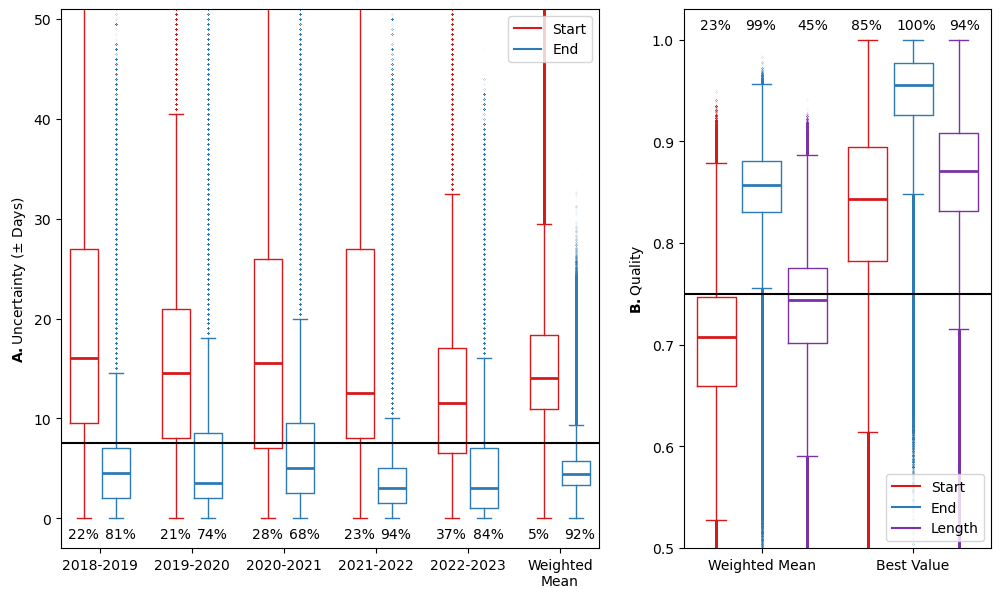

In [19]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, width_ratios = [7/11, 4/11], figsize = (12,7))

# Uncertainty plot
plt.sca(ax0)
ticks = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', 'Weighted\nMean']

start_u_plot = plt.boxplot(start_u_ar, positions = np.array(np.arange(len(start_u_ar))) * 2 - 0.35, widths = 0.6, 
                           medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
end_u_plot = plt.boxplot(end_u_ar, positions = np.array(np.arange(len(end_u_ar))) * 2 + 0.35, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color = color_code)
         
    plt.plot([], c = color_code, label = label)
    plt.legend(loc = 'upper right')

define_box_properties(start_u_plot, '#D7191C', 'Start')
define_box_properties(end_u_plot, '#2C7BB6', 'End')

plt.axhline(y = 7.5, color = 'black')

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

plt.ylim(-3, 51) # 100

plt.ylabel(r'$\bf{' + 'A.' + '}$' + 'Uncertainty (± Days)')
           
for i in range(6):
    plt.annotate(start_good[i], xy = (i * 2 - 0.7, -2))
    plt.annotate(end_good[i], xy = (i * 2 + 0.1, -2))

# Quality plot
plt.sca(ax1)

ticks = ['Weighted Mean\n', 'Best Value\n']

start_q_plot = plt.boxplot(start_q_ar, positions = np.array(np.arange(len(start_q_ar))) * 2.33 - 0.35, widths = 0.6, 
                           medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
end_q_plot = plt.boxplot(end_q_ar, positions = np.array(np.arange(len(end_q_ar))) * 2.33 + 0.35, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))
length_q_plot = plt.boxplot(length_q_ar, positions = np.array(np.arange(len(length_q_ar))) * 2.33 + 1.05, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#7b32a8'))

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color = color_code)
         
    plt.plot([], c = color_code, label = label)
    plt.legend(loc = 'lower right')

define_box_properties(start_q_plot, '#D7191C', 'Start')
define_box_properties(end_q_plot, '#2C7BB6', 'End')
define_box_properties(length_q_plot, '#7b32a8', 'Length')

plt.axhline(y = 0.75, color = 'black')

plt.xticks(np.arange(len(end_q_ar)) * 2.33 + 0.35, ticks)

plt.ylim(0.5, 1.03) # 100

plt.ylabel(r'$\bf{' + 'B.' + '}$' + 'Quality')

for i in range(2):
    plt.annotate(start_good_q[i], xy = (i * 2.33 - 0.6, 1.01))
    plt.annotate(end_good_q[i], xy = (i * 2.33 + 0.1, 1.01))
    plt.annotate(length_good_q[i], xy = (i * 2.33 + 0.9, 1.01))


plt.show()

fig.get_figure().savefig('HBL_uncertaintyQuality.tif', dpi = 300, bbox_inches = 'tight')

In [20]:
# Medians
print('Start Uncertainty Median (2018-2019) = ' + str(np.median(start_u_1819)))
print('Start Uncertainty Median (2019-2020) = ' + str(np.median(start_u_1920)))
print('Start Uncertainty Median (2020-2021) = ' + str(np.median(start_u_2021)))
print('Start Uncertainty Median (2021-2022) = ' + str(np.median(start_u_2122)))
print('Start Uncertainty Median (2022-2023) = ' + str(np.median(start_u_2223)))
print('Start Uncertainty (Weighted Mean 2018-2023) = ' + str(round(np.median(start_wmu), 1)))

Start Uncertainty Median (2018-2019) = 16.0
Start Uncertainty Median (2019-2020) = 14.5
Start Uncertainty Median (2020-2021) = 15.5
Start Uncertainty Median (2021-2022) = 12.5
Start Uncertainty Median (2022-2023) = 11.5
Start Uncertainty (Weighted Mean 2018-2023) = 14.0


In [21]:
print('End Uncertainty Median (2018-2019) = ' + str(np.median(end_u_1819)))
print('End Uncertainty Median (2019-2020) = ' + str(np.median(end_u_1920)))
print('End Uncertainty Median (2020-2021) = ' + str(np.median(end_u_2021)))
print('End Uncertainty Median (2021-2022) = ' + str(np.median(end_u_2122)))
print('End Uncertainty Median (2022-2023) = ' + str(np.median(end_u_2223)))
print('End Uncertainty (Weighted Mean 2018-2023) = ' + str(round(np.median(end_wmu), 1)))

End Uncertainty Median (2018-2019) = 4.5
End Uncertainty Median (2019-2020) = 3.5
End Uncertainty Median (2020-2021) = 5.0
End Uncertainty Median (2021-2022) = 3.0
End Uncertainty Median (2022-2023) = 3.0
End Uncertainty (Weighted Mean 2018-2023) = 4.4


In [22]:
print('Start Weighted Mean Quality Median = ' + str(round(np.median(start_wmq), 2)))
print('End Weighted Mean Quality Median = ' + str(round(np.median(end_wmq), 2)))
print('Length Weighted Mean Quality Median = ' + str(round(np.median(length_wmq), 2)))

Start Weighted Mean Quality Median = 0.71
End Weighted Mean Quality Median = 0.86
Length Weighted Mean Quality Median = 0.74


In [23]:
print('Start Best Value Quality Median = ' + str(round(np.median(start_bvq), 2)))
print('End Best Value Quality Median = ' + str(round(np.median(end_bvq), 2)))
print('Length Best Value Quality Median = ' + str(round(np.median(length_bvq), 2)))

Start Best Value Quality Median = 0.84
End Best Value Quality Median = 0.96
Length Best Value Quality Median = 0.87
